In [64]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [65]:
!pip install keras

In [66]:
from keras.datasets import mnist


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import mnist

# flow of autoencoder
**Input image->Encoder->Compressed Representation->Decoder->Reconstruct Input Image**

In [68]:
#load the dataset

In [69]:
(x_train, _),(x_test, _)= mnist.load_data()

In [70]:
#normalize the image data

In [71]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [72]:
#reshape the input data for the model

In [73]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)
x_test.shape

(10000, 28, 28, 1)

**Exploratory Data Analysis**

In [74]:
#randomly select input image
index=np.random.randint(len(x_test))
index

627

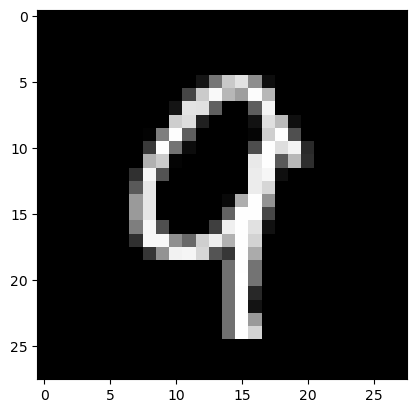

In [75]:
#plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()


**MODEL CREATION**

In [76]:
model=Sequential([
    # encoder network
    Conv2D(32 ,3 ,activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16 ,3 ,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    #decoder network
    Conv2D(16 ,3 ,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32 ,3 ,activation='relu',padding='same'),
    UpSampling2D(2),
    #output layer
    Conv2D(1 ,3 ,activation='sigmoid',padding='same')
        
])
model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
#training the model 
model.fit(x_train,x_train,epochs=20,batch_size=256,validation_data=(x_test,x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 0.3299 - val_loss: 0.0898
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0874 - val_loss: 0.0798
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0793 - val_loss: 0.0760
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0764 - val_loss: 0.0742
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0746 - val_loss: 0.0732
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0733 - val_loss: 0.0721
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0726 - val_loss: 0.0714
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0720 - val_loss: 0.0709
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0715 - val_loss: 0.0705
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 0.0705 - val_loss: 0.0698
Epoch 12/20
235/235 ━━━━━━━━━━

**Visualize the results**

In [85]:
#predict the results from model (get compressed images)
pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


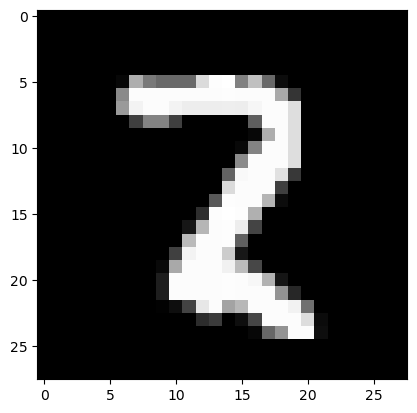

In [86]:
#randomly select input image
index=np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

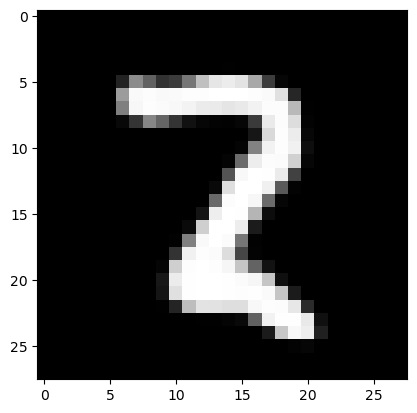

In [87]:
#visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

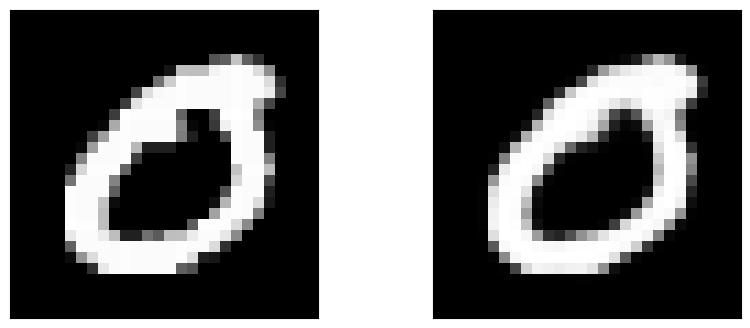

In [88]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()